# Exploratory Data Analysis of EPL Players for 2020-21 season

Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
epl = pd.read_csv('EPL_20_21.csv')
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [7]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [8]:
epl.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


Checking for missing values

In [9]:
epl.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [10]:
epl.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

### Creating two new colums for Minutes per match and goals per match for each player

In [11]:
epl['MinPerMatch'] = (epl['Mins'] / epl['Matches']).astype(float)
epl['GoalsPerMatch'] = (epl['Goals'] / epl['Matches']).astype(float)
pd.options.display.float_format = "{:.2f}".format
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.30,1,1,0.21,0.24,2,0,80.28,0.17
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.60,0,0,0.00,0.00,2,0,88.55,0.00
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.20,0,0,0.41,0.21,2,0,74.34,0.17
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.60,0,0,0.10,0.11,3,0,84.67,0.11
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.00,0,0,0.06,0.12,3,0,74.16,0.03


### Overral Total Goals

In [12]:
Total_Goals = epl.Goals.sum()
print('The Total Goals for the season is :' ,Total_Goals)

The Total Goals for the season is : 986


### Total Number of Penalty Attempted

In [13]:
Total_PenaltyAttempt = epl['Penalty_Attempted'].sum()
print('The total penalty attemted :' ,Total_PenaltyAttempt)

The total penalty attemted : 125


### Total Number of penalty scored

In [14]:
Total_Penalty = epl['Penalty_Goals'].sum()
print('The total penalty scored :' ,Total_Penalty)

The total penalty scored : 102


### Total Number of penalty missed

In [15]:
penalty_missed = Total_PenaltyAttempt - Total_Penalty
print('The total Penalty missed :', penalty_missed)

The total Penalty missed : 23


### Percentage of penalty scored to missed

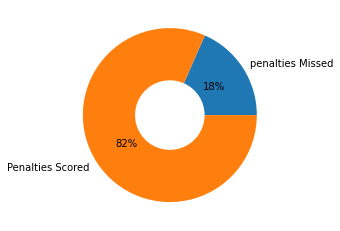

In [16]:
data = [penalty_missed,Total_Penalty]
lab = ['penalties Missed','Penalties Scored']
space = np.ones(2)/10
plt.pie(data, labels = lab,  wedgeprops=dict(width=0.6), autopct = '%.0f%%')
plt.show()

### Number of unique position of the players

In [17]:
epl.Position.unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

### Total number of players in each position

In [18]:
epl['Position'].value_counts()

DF       178
MF       108
FW        81
FW,MF     47
GK        42
MF,FW     36
DF,MF     15
MF,DF     13
FW,DF      6
DF,FW      6
Name: Position, dtype: int64

### Total number of countries of the player

In [19]:
number_of_nation = epl['Nationality'].nunique()
print('The total number of country of the player: ',number_of_nation)

The total number of country of the player:  59


### Top 10 countries with the most number of players

In [20]:
top_10_country = epl['Nationality'].value_counts().head(10)
top_10_country

ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
Name: Nationality, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

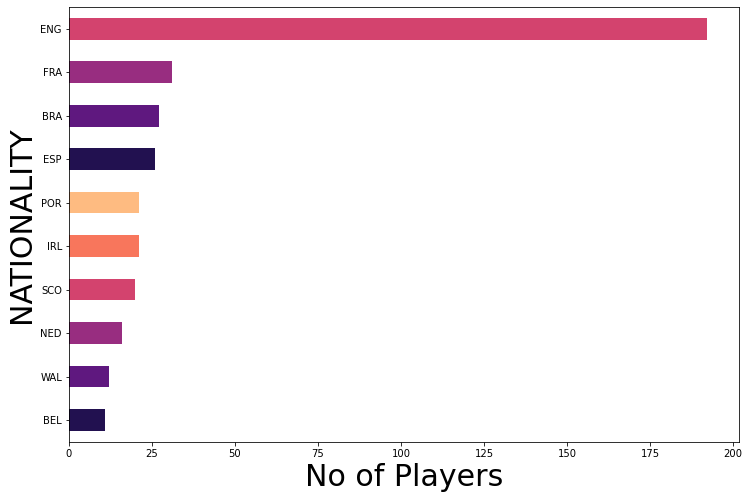

In [103]:
top_10_country.sort_values(ascending = True).plot(kind = 'barh', figsize=(12,8), color=sns.color_palette('magma'))
plt.ylabel('NATIONALITY', fontsize=30)
plt.xlabel('No of Players', fontsize=30)
plt.plot

### The number of players in each club

West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Chelsea                    27
Newcastle United           27
Brighton                   27
Wolverhampton Wanderers    27
Sheffield United           27
Leicester City             27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: Club, dtype: int64


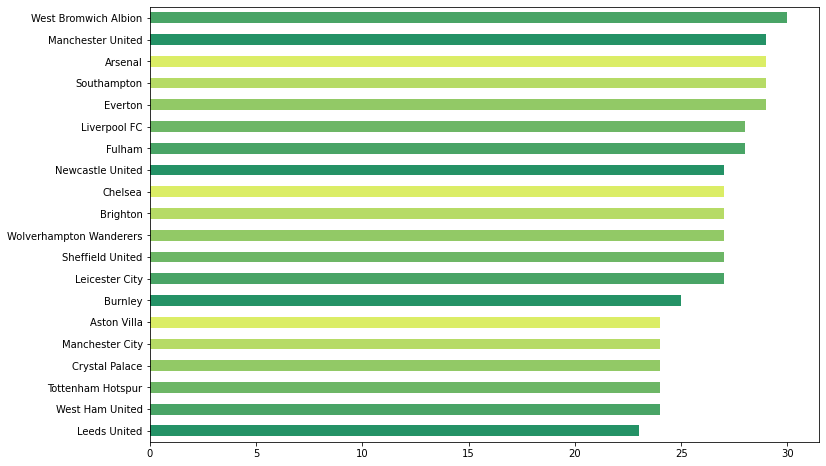

In [105]:
print(epl['Club'].value_counts())
epl['Club'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize=(12,8), color= sns.color_palette('summer'))
plt.show()

### Age group of the players

In [23]:
under_20 = epl[epl['Age'] <= 20]
Age20_25 = epl[(epl['Age'] > 20) & (epl['Age'] <= 25)]
Age25_30 = epl[(epl['Age'] > 25) & (epl['Age'] <= 30)]
above30 = epl[epl['Age'] > 30]

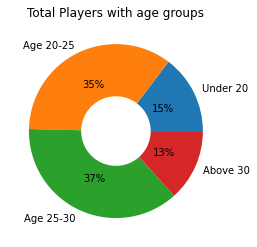

In [28]:
x = np.array([under_20['Name'].count(),Age20_25['Name'].count(),Age25_30['Name'].count(),above30['Name'].count()])
lab = ['Under 20', 'Age 20-25', 'Age 25-30', 'Above 30']
plt.pie(x, labels = lab, wedgeprops=dict(width=0.6), autopct = '%.0f%%')
plt.title("Total Players with age groups")
plt.show()

### Total number of under 20 players in each club

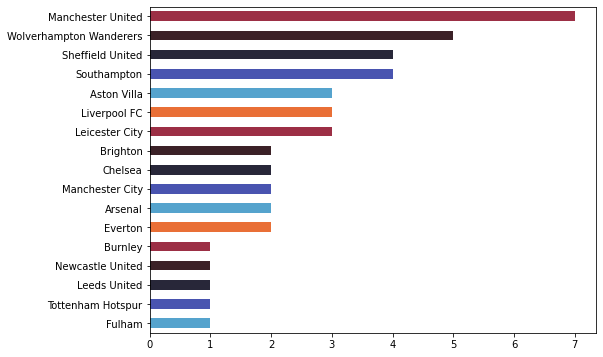

In [31]:
player_under20 = epl[epl['Age'] < 20]
player_under20['Club'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('icefire'), figsize=(8,6))
plt.show()

### Total number of players above 30 in each club

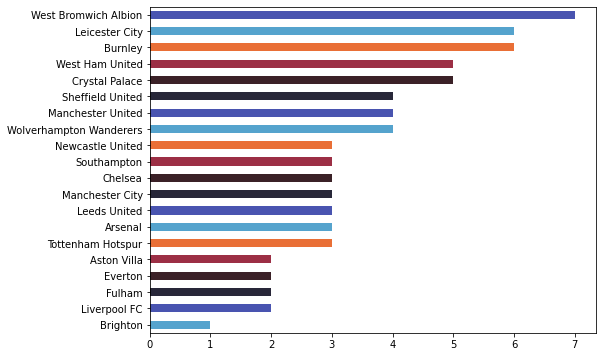

In [32]:
above30 = epl[epl['Age'] > 30]
above30['Club'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('icefire'), figsize=(8,6))
plt.show()

### Under 20 players in Manchester United

In [34]:
player_under20[player_under20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.10,0,0,0.37,0.09,2,0,58.77,0.23
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.70,0,0,0.05,0.01,0,0,47.00,0.00
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.40,0,0,0.02,0.26,0,0,55.33,0.00
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.10,0,0,0.16,0.02,0,0,77.50,0.50
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.00,0,0,0.00,0.00,0,0,5.50,0.00
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.00,0,0,0.00,0.00,0,0,9.00,0.00
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.00,0,0,0.00,0.00,0,0,1.00,0.00


### Over 30 players in West bromwich Albion

In [36]:
above30[above30['Club'] == 'West Bromwich Albion']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinPerMatch,GoalsPerMatch
493,Branislav Ivanović,West Bromwich Albion,SRB,DF,36,13,8,767,0,0,311,85.20,0,0,0.06,0.01,2,0,59.00,0.00
494,Robert Snodgrass,West Bromwich Albion,SCO,"MF,FW",32,8,6,526,0,0,133,78.90,0,0,0.03,0.06,2,0,65.75,0.00
496,Lee Peltier,West Bromwich Albion,ENG,DF,33,4,3,229,0,0,76,63.20,0,0,0.00,0.00,1,0,57.25,0.00
497,Hal Robson-Kanu,West Bromwich Albion,WAL,FW,31,19,2,561,2,0,86,74.40,0,0,0.24,0.06,2,0,29.53,0.11
498,Kamil Grosicki,West Bromwich Albion,POL,"FW,MF",32,3,2,148,0,1,49,65.30,0,0,0.06,0.07,0,0,49.33,0.00
500,David Button,West Bromwich Albion,ENG,GK,31,1,1,90,0,0,37,43.20,0,0,0.00,0.00,0,0,90.00,0.00
502,Charlie Austin,West Bromwich Albion,ENG,FW,31,5,0,138,0,0,34,73.50,0,0,0.13,0.00,0,0,27.60,0.00


### Average age of players in each club

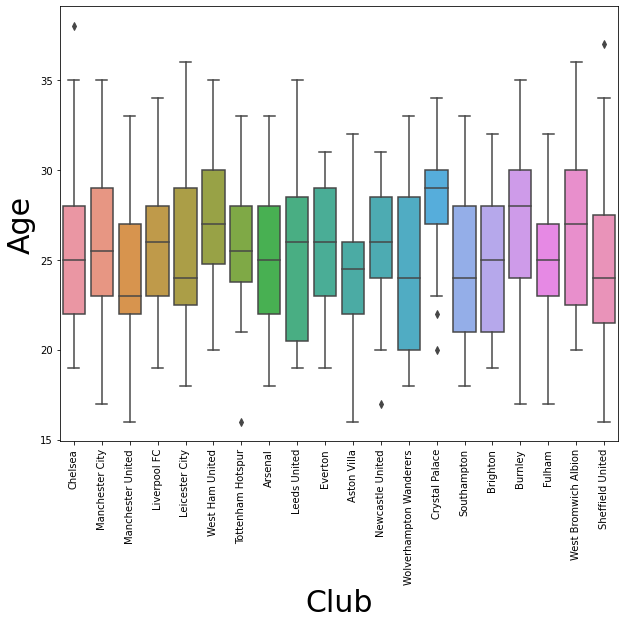

In [102]:
plt.figure(figsize=(10,8))
sns.boxplot(data = epl, x ='Club', y = 'Age')
plt.xticks(rotation = 90)
plt.ylabel('Age', fontsize=30)
plt.xlabel('Club', fontsize=30)
plt.show()

### Total assist from each club

In [80]:
epl.groupby('Club')['Assists'].sum().sort_values(ascending = False)

Club
Manchester City            55
Manchester United          51
Tottenham Hotspur          50
West Ham United            46
Leeds United               45
Leicester City             45
Liverpool FC               43
Aston Villa                38
Arsenal                    38
Chelsea                    38
Southampton                33
Everton                    32
Crystal Palace             29
Newcastle United           26
Brighton                   24
Wolverhampton Wanderers    21
Burnley                    20
West Bromwich Albion       20
Fulham                     18
Sheffield United           13
Name: Assists, dtype: int64

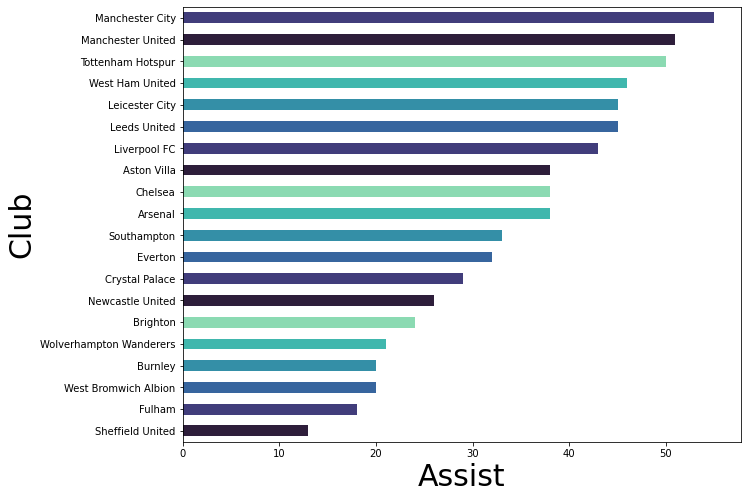

In [60]:
all_club_assist = epl.groupby('Club')['Assists'].sum()
all_club_assist.sort_values(ascending = 1).plot(kind = 'barh', figsize=(10,8), color = sns.color_palette('mako'))
plt.ylabel('Club', fontsize=30)
plt.xlabel('Assist', fontsize=30)
plt.show()

### Total goal from each club

In [81]:
epl.groupby('Club')['Goals'].sum().sort_values(ascending = False)

Club
Manchester City            82
Manchester United          70
Tottenham Hotspur          66
Liverpool FC               65
Leicester City             64
Leeds United               60
West Ham United            60
Chelsea                    56
Arsenal                    53
Aston Villa                52
Southampton                47
Everton                    45
Newcastle United           44
Crystal Palace             39
Brighton                   39
Wolverhampton Wanderers    34
West Bromwich Albion       33
Burnley                    32
Fulham                     26
Sheffield United           19
Name: Goals, dtype: int64

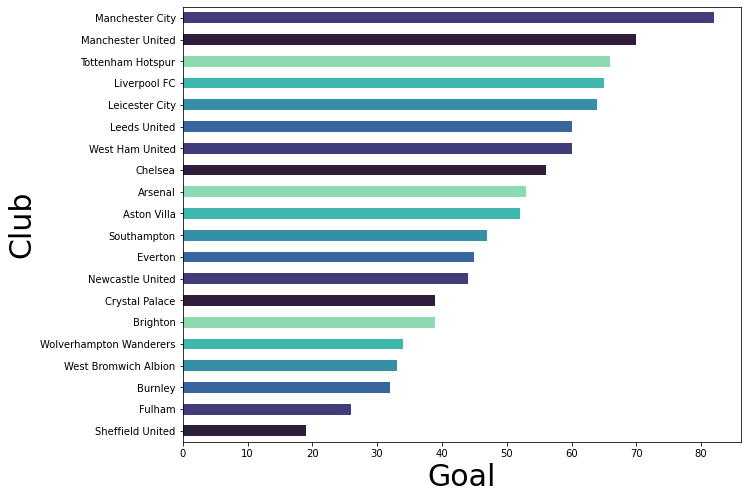

In [59]:
all_club_assist = epl.groupby('Club')['Goals'].sum()
all_club_assist.sort_values(ascending = True).plot(kind = 'barh', figsize=(10,8), color = sns.color_palette('mako'))
plt.ylabel('Club', fontsize=30)
plt.xlabel('Goal', fontsize=30)
plt.show()

### Total number of yellow cards for each club

In [82]:
epl.groupby('Club')['Yellow_Cards'].sum().sort_values(ascending = False)

Club
Sheffield United           73
Aston Villa                71
Fulham                     67
Newcastle United           65
Manchester United          64
Leeds United               61
Leicester City             61
Everton                    59
Tottenham Hotspur          57
Crystal Palace             56
Wolverhampton Wanderers    55
Southampton                52
West Bromwich Albion       51
Chelsea                    51
West Ham United            50
Arsenal                    49
Brighton                   49
Burnley                    48
Manchester City            46
Liverpool FC               40
Name: Yellow_Cards, dtype: int64

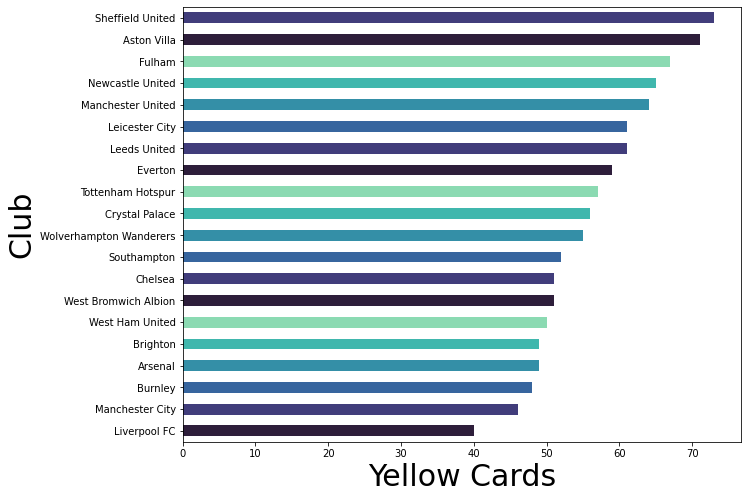

In [58]:
all_club_assist = epl.groupby('Club')['Yellow_Cards'].sum()
all_club_assist.sort_values(ascending = True).plot(kind = 'barh', figsize=(10,8), color = sns.color_palette('mako'))
plt.ylabel('Club', fontsize=30)
plt.xlabel('Yellow Cards', fontsize=30)
plt.show()

### Total number of red cards for each club

In [83]:
epl.groupby('Club')['Red_Cards'].sum().sort_values(ascending = False)

Club
Brighton                   6
Arsenal                    5
West Bromwich Albion       4
Aston Villa                4
Sheffield United           3
West Ham United            3
Chelsea                    3
Fulham                     3
Southampton                3
Newcastle United           3
Crystal Palace             2
Everton                    2
Tottenham Hotspur          2
Manchester City            2
Wolverhampton Wanderers    1
Manchester United          1
Leeds United               1
Leicester City             0
Burnley                    0
Liverpool FC               0
Name: Red_Cards, dtype: int64

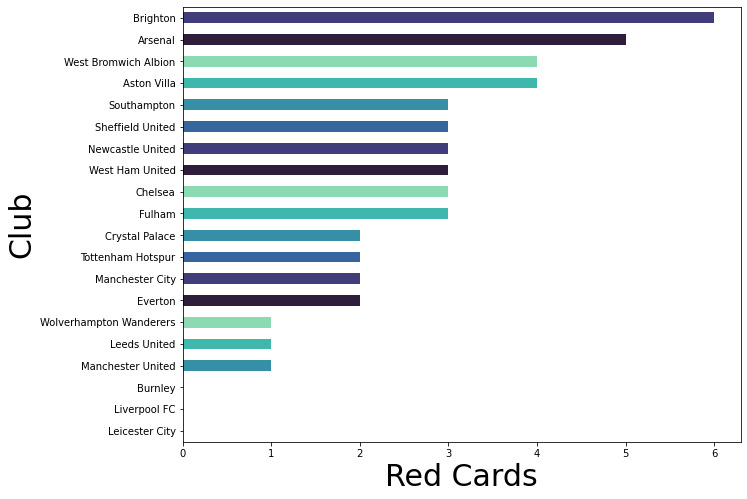

In [57]:
all_club_assist = epl.groupby('Club')['Red_Cards'].sum()
all_club_assist.sort_values(ascending = True).plot(kind = 'barh', figsize=(10,8), color = sns.color_palette('mako'))
plt.ylabel('Club', fontsize=30)
plt.xlabel('Red Cards', fontsize=30)
plt.show()

### Top 10 highest goal scorer

In [93]:
top_10_goal = epl[['Name', 'Club', 'Goals', 'Matches']].sort_values(by = 'Goals', ascending = False).reset_index()
top_10_goal.index = top_10_goal.index + 1
top_10_goal.drop(columns = ['index']).head(10)

,Name,Club,Goals,Matches
1,Harry Kane,Tottenham Hotspur,23,35
2,Mohamed Salah,Liverpool FC,22,37
3,Bruno Fernandes,Manchester United,18,37
4,Patrick Bamford,Leeds United,17,38
5,Son Heung-min,Tottenham Hotspur,17,37
6,Dominic Calvert-Lewin,Everton,16,33
7,Jamie Vardy,Leicester City,15,34
8,Ollie Watkins,Aston Villa,14,37
9,İlkay Gündoğan,Manchester City,13,28
10,Alexandre Lacazette,Arsenal,13,31


### Top 10 highsest assist

In [91]:
top_10_asssits = epl[['Name', 'Club', 'Assists', 'Matches']].sort_values(by = 'Assists', ascending = False).reset_index()
top_10_asssits.index = top_10_asssits.index + 1
top_10_asssits.drop(columns =['index']).head(10)

,Name,Club,Assists,Matches
1,Harry Kane,Tottenham Hotspur,14,35
2,Kevin De Bruyne,Manchester City,12,25
3,Bruno Fernandes,Manchester United,12,37
4,Jack Grealish,Aston Villa,10,26
5,Son Heung-min,Tottenham Hotspur,10,37
6,Jamie Vardy,Leicester City,9,34
7,Raphael Dias Belloli,Leeds United,9,30
8,Marcus Rashford,Manchester United,9,37
9,Aaron Cresswell,West Ham United,8,36
10,Pascal Groß,Brighton,8,34


### Club with the most passes attempted

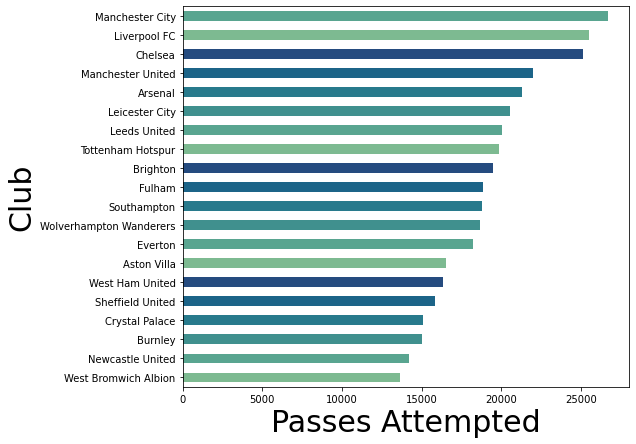

In [72]:
passes_attempted = epl.groupby('Club')['Passes_Attempted'].sum()
passes_attempted.sort_values(ascending = 1).head(20).plot(kind = 'barh', figsize=(8,7), color = sns.color_palette('crest'))
plt.ylabel('Club', fontsize=30)
plt.xlabel('Passes Attempted', fontsize=30)
plt.show()

In [79]:
epl.groupby('Club')['Passes_Attempted'].sum().sort_values(ascending = False)

Club
Manchester City            26688
Liverpool FC               25526
Chelsea                    25151
Manchester United          21960
Arsenal                    21291
Leicester City             20572
Leeds United               20043
Tottenham Hotspur          19872
Brighton                   19456
Fulham                     18860
Southampton                18761
Wolverhampton Wanderers    18661
Everton                    18246
Aston Villa                16556
West Ham United            16358
Sheffield United           15843
Crystal Palace             15092
Burnley                    15043
Newcastle United           14218
West Bromwich Albion       13646
Name: Passes_Attempted, dtype: int64